**Лабораторная работа №2**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

**Диабет у индейцев Пима**

In [3]:
import pandas as pd 
df = pd.read_csv("..//static//csv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Проблемная область: медицина и эпидемиология

Объект наблюдения: женщины индейского племени Пима, проживающие вблизи Финикса, штат Аризона, США

Атрибуты: беременность, глюкоза, артериальное давление, толщина кожи, инсулин, индекс массы тела, родословная диабета, возраст, исход

Пример бизнес-цели:
1. Повышение эффективности скрининга диабета. Цель технического проекта: Разработать и обучить модель машинного обучения с точностью предсказания не менее 85% для автоматизированного скрининга диабета на основе данных датасета "Диабет у индейцев Пима".

2. Снижение медицинских расходов. Цель технического проекта: Оптимизировать модель прогнозирования таким образом, чтобы минимизировать количество ложноотрицательных результатов (пациенты с диабетом, которые не были выявлены), что позволит снизить затраты на лечение осложнений.

3. Повышение качества жизни пациентов. Цель технического проекта: Разработать интерфейс для модели, который будет предоставлять пациентам персонализированные рекомендации по профилактике и лечению диабета на основе их индивидуальных рисков, определенных моделью.

Проверяем на наличие выбросов

Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'SkinThickness': 1
Количество выбросов в столбце 'Insulin': 34


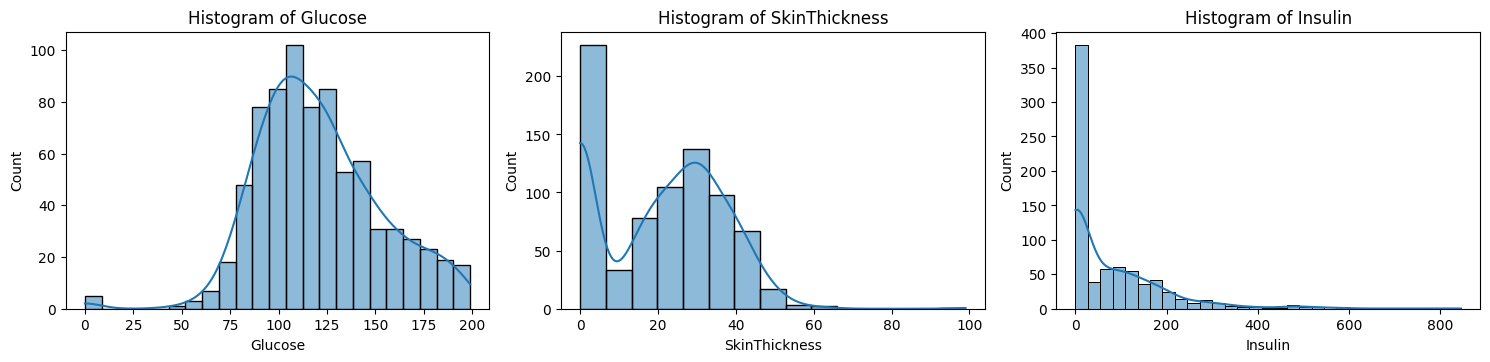

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
df = pd.read_csv("..//static//csv//diabetes.csv")

# Выбираем столбцы для анализа
columns_to_check = ['Glucose', 'SkinThickness', 'Insulin']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Можно увидеть, что количество выбросов маленькое. Можем сделать очистку для столбца 'Insulin'

Количество удаленных строк: 34
Количество выбросов в столбце 'Insulin': 7


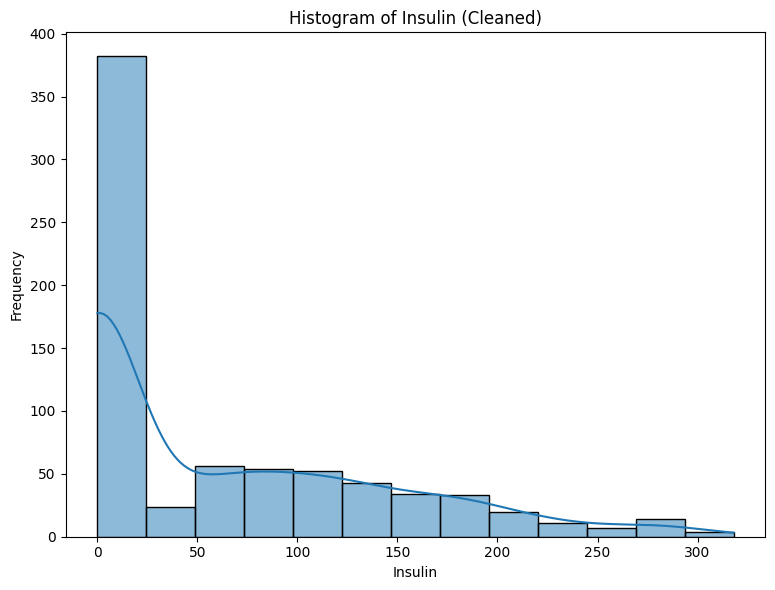

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
df = pd.read_csv("..//static//csv//diabetes.csv")

# Выбираем столбцы для очистки
columns_to_clean = ['Insulin']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_clean)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для Insulin
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Insulin'], kde=True)
plt.title('Histogram of Insulin (Cleaned)')
plt.xlabel('Insulin')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Проверка на пропущенные значения

In [13]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Пропущенных значений нет. Делаем разбиение на выборки

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер контрольной выборки:", X_val.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 440
Размер контрольной выборки: 147
Размер тестовой выборки: 147


Разбивка на выборки сделана, проведем проверку на сбалансированность выборок

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности
check_balance(y_train, y_val, y_test)

Сбалансированность обучающей выборки:
Outcome
0    0.661364
1    0.338636
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.659864
1    0.340136
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.659864
1    0.340136
Name: proportion, dtype: float64


Выборки относительно сбалансированы, но не идеально. Сделаем приращение данных методом выборки с избытком (oversampling)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Применение SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Проверка сбалансированности контрольной и тестовой выборок
check_balance(y_train_resampled, y_val, y_test)

Сбалансированность обучающей выборки после SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64
Сбалансированность обучающей выборки:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.659864
1    0.340136
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.659864
1    0.340136
Name: proportion, dtype: float64


**Объекты вокруг земли**

Проблемная область: космические объекты и их угроза для Земли

Объект наблюдения: астероиды и другие малые тела Солнечной системы

Атрибуты: имя объекта, минимальный и максимальный оценочные диаметры, относительная скорость, расстояние промаха, орбитальное тело, объекты программы "Сентри", абсолютная звездная величина, опасность

Пример бизнес-цели:

1. Разработка и продажа страховых продуктов для космических рисков. Цель технического проекта: разработка системы оценки рисков и ценообразования для страховых продуктов, защищающих от космических угроз.

2. Разработка и продажа технологий для мониторинга и предотвращения космических угроз. Цель технического проекта: создание системы мониторинга и прогнозирования траекторий небесных тел для предотвращения космических угроз.

3. Образовательные программы и сервисы. Цель технического проекта: разработка интерактивных образовательных материалов и сервисов, основанных на данных о небесных телах.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# вывод всех столбцов
df = pd.read_csv("..//static//csv//neo.csv")
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


Проверяем на выбросы

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


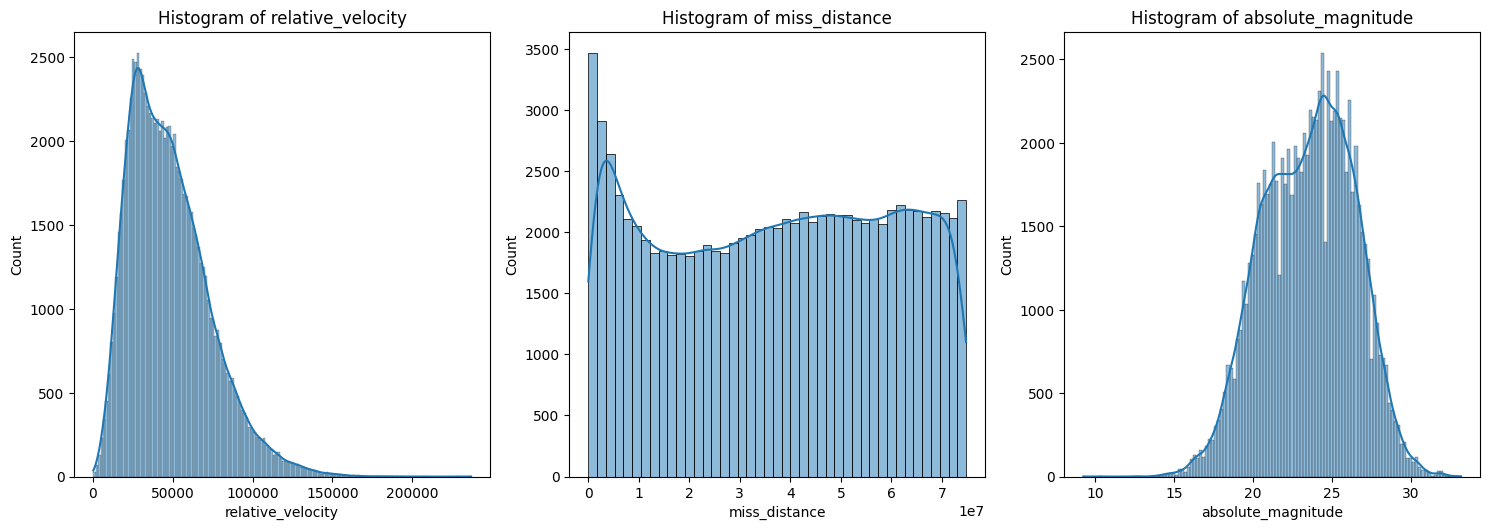

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

В столбцах 'relative_velocity'и 'absolute_magnitude' присутствуют выбросы. Теперь можно очистить их от выбросов

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'absolute_magnitude': 101
Количество удаленных строк: 1678


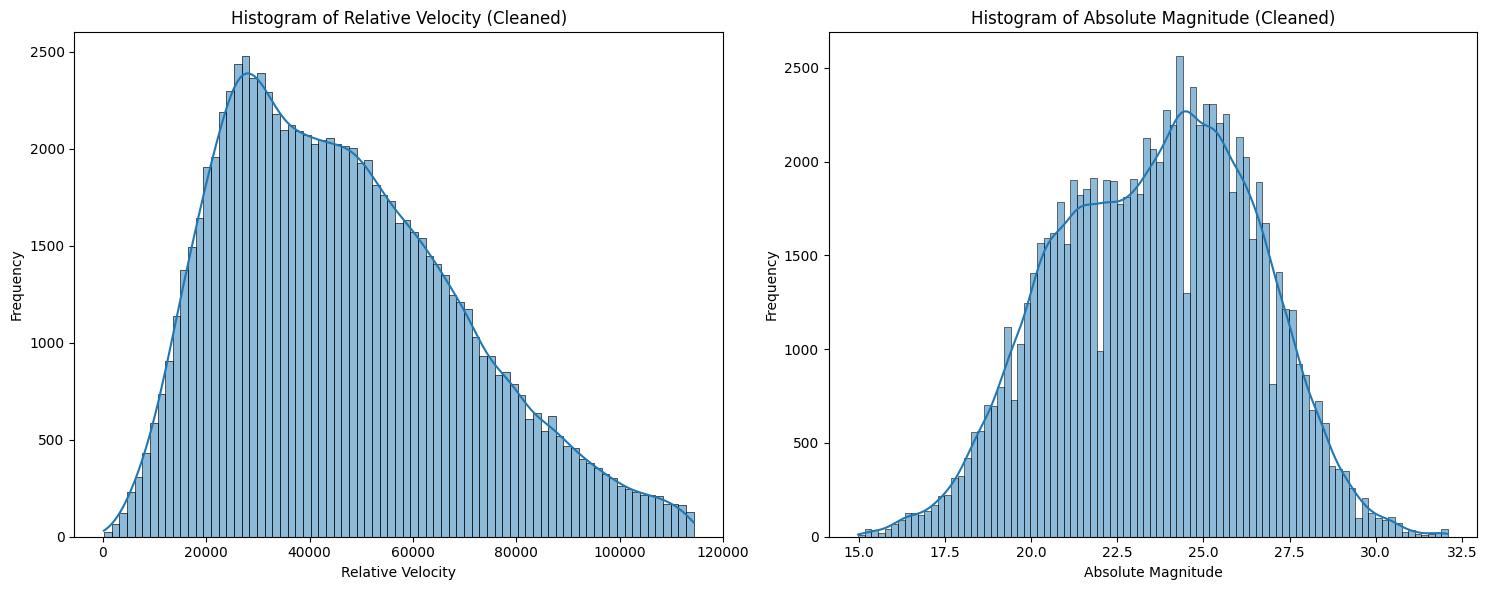

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Выбираем столбцы для очистки
columns_to_clean = ['relative_velocity', 'absolute_magnitude']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['relative_velocity'], kde=True)
plt.title('Histogram of Relative Velocity (Cleaned)')
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')

# Гистограмма для absolute_magnitude
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['absolute_magnitude'], kde=True)
plt.title('Histogram of Absolute Magnitude (Cleaned)')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//static//csv//neo.csv", index=False)

Можно заметить, что выбросов стало меньше

In [25]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Пропущенных значений в датасете нет. Можно перейти к созданию выборок

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что 'hazardous' - это целевая переменная
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (54501, 9)
Размер контрольной выборки: (18167, 9)
Размер тестовой выборки: (18168, 9)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
hazardous
False    0.902681
True     0.097319
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
hazardous
False    0.902681
True     0.097319
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
hazardous
False    0.902686
True     0.097314
Name: proportion, dtype: float64


Выборки хорошо сбалансированы и не нуждаются в корректировках

**Онлайн обучение**


Проблемная область: Анализ гибкости и адаптации студентов к онлайн-обучению, включая их предпочтения, проблемы и успеваемость.

Объект наблюдения: Студенты, участвующие в онлайн-обучении, и их взаимодействие с образовательными платформами и ресурсами.

Атрибуты: возраст, пол, уровень образования, предпочтения в обучении, проблемы в обучении, успеваемость
Возраст: Возраст студента.

Пример бизнес-цели: Разработка и внедрение платформы для онлайн-обучения, адаптированной к предпочтениям и потребностям студентов, с целью повышения их вовлеченности и успеваемости.

In [38]:
import pandas as pd
df = pd.read_csv("..//static//csv//students_adaptability_level_online_education.csv")
print(df.columns)

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object')


При помощи ящика с усами и колонки возраста проверим набор на баланс.

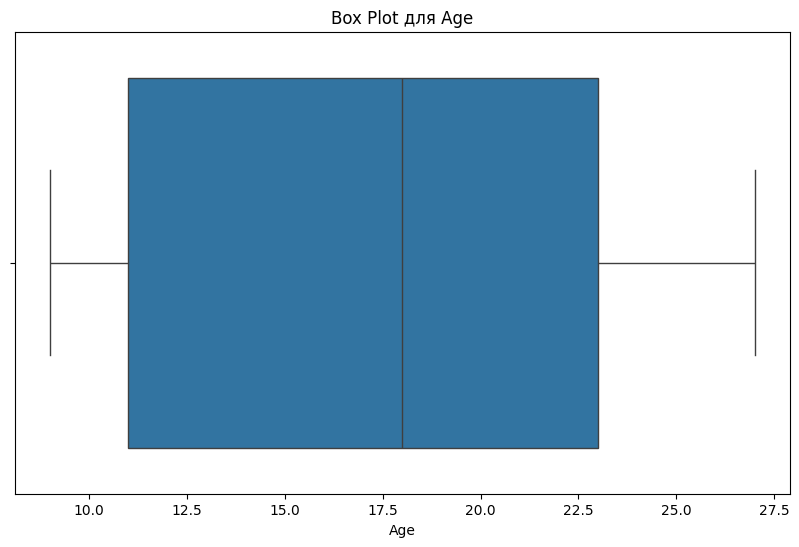

In [ ]:
# Box plot для столбца 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot для Age')
plt.xlabel('Age')
plt.show()

Проверим на шум

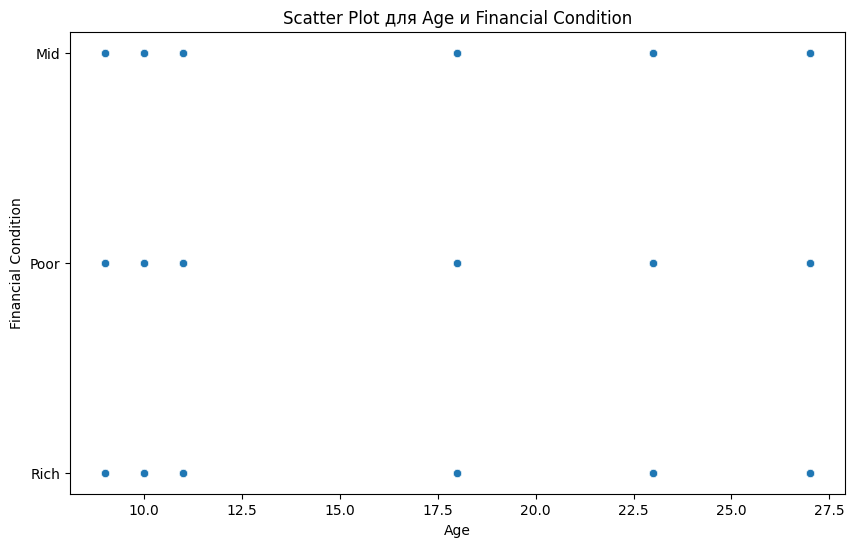

In [40]:
# Scatter plot для столбцов 'Age' и 'Financial Condition'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Financial Condition', data=df)
plt.title('Scatter Plot для Age и Financial Condition')
plt.xlabel('Age')
plt.ylabel('Financial Condition')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [43]:
#Удаление строк с пустыми значениями
df_cleaned = df.dropna()

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 723
Размер контрольной выборки: 241
Размер тестовой выборки: 241


Применение методов приращения данных (аугментации)

In [44]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

def check_balance(df, name):
    counts = df['Gender'].value_counts()
    print(f"Распределение Gender в {name}:")
    print(counts)
    print()

def oversample(df):
    X = df.drop('Gender', axis=1)
    y = df['Gender']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

def undersample(df):
    X = df.drop('Gender', axis=1)
    y = df['Gender']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Gender в обучающей выборке после oversampling:
Gender
Male      397
Female    397
Name: count, dtype: int64

Распределение Gender в контрольной выборке после oversampling:
Gender
Male      140
Female    140
Name: count, dtype: int64

Распределение Gender в тестовой выборке после oversampling:
Gender
Female    126
Male      126
Name: count, dtype: int64

Распределение Gender в обучающей выборке после undersampling:
Gender
Female    326
Male      326
Name: count, dtype: int64

Распределение Gender в контрольной выборке после undersampling:
Gender
Female    101
Male      101
Name: count, dtype: int64

Распределение Gender в тестовой выборке после undersampling:
Gender
Female    115
Male      115
Name: count, dtype: int64

